#RANDOMFOREST와 SMOTE(오버샘플링)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('imputed.csv')  # CSV 파일 로드

In [ ]:


# 타겟 변수 인코딩
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

# 문자열 데이터를 숫자로 변환
for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# 피처와 타겟 분리
X = data.drop('target', axis=1)
y = data['target']

# 데이터 불균형 처리 (SMOTE 사용)
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

# 데이터 분할 (Train 70%, Test 30%)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

검증 데이터 평가 결과:

              precision    recall  f1-score   support

    AbNormal       0.59      0.60      0.60       699
      Normal       0.60      0.59      0.60       711

    accuracy                           0.60      1410
   macro avg       0.60      0.60      0.60      1410
weighted avg       0.60      0.60      0.60      1410



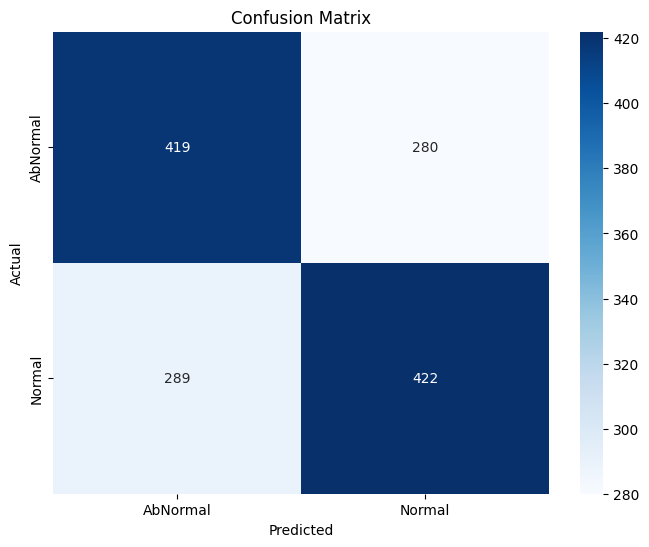

In [ ]:
# 모델 생성 및 훈련
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 성능 평가 보고서 출력
print("검증 데이터 평가 결과:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.inverse_transform([0, 1])))

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=label_encoder.inverse_transform([0, 1]), yticklabels=label_encoder.inverse_transform([0, 1]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#RANDOMFOREST,특정클래스 가중치주기

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('imputed.csv')  # CSV 파일 로드

# 타겟 변수 인코딩
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

# 문자열 데이터를 숫자로 변환
for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# 피처와 타겟 분리
X = data.drop('target', axis=1)
y = data['target']

# 데이터 분할 (Train 70%, Test 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


검증 데이터 평가 결과:

              precision    recall  f1-score   support

    AbNormal       0.60      0.63      0.62       699
      Normal       0.62      0.59      0.60       711

    accuracy                           0.61      1410
   macro avg       0.61      0.61      0.61      1410
weighted avg       0.61      0.61      0.61      1410



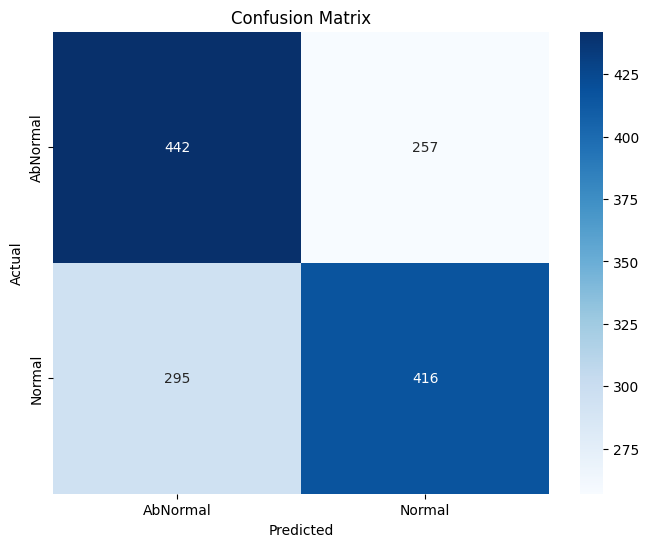

In [ ]:
# 모델 생성 (클래스 가중치 조정)
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 성능 평가 보고서 출력
print("검증 데이터 평가 결과:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.inverse_transform([0, 1])))

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=label_encoder.inverse_transform([0, 1]),
            yticklabels=label_encoder.inverse_transform([0, 1]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#RANDOMFOREST와 RANDOMUNDERSAMPLER(언더샘플링)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('imputed.csv')

# 타겟 변수 인코딩
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

# 문자열 데이터를 숫자로 변환
for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# 피처와 타겟 분리
X = data.drop('target', axis=1)
y = data['target']

# 데이터 불균형 처리 (언더샘플링 사용)
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X, y)


In [ ]:
# 데이터 분할 (Train 70%, Test 30%)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# 모델 생성 및 훈련
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

검증 데이터 평가 결과:

              precision    recall  f1-score   support

    AbNormal       0.63      0.61      0.62       711
      Normal       0.62      0.64      0.63       699

    accuracy                           0.62      1410
   macro avg       0.62      0.62      0.62      1410
weighted avg       0.62      0.62      0.62      1410



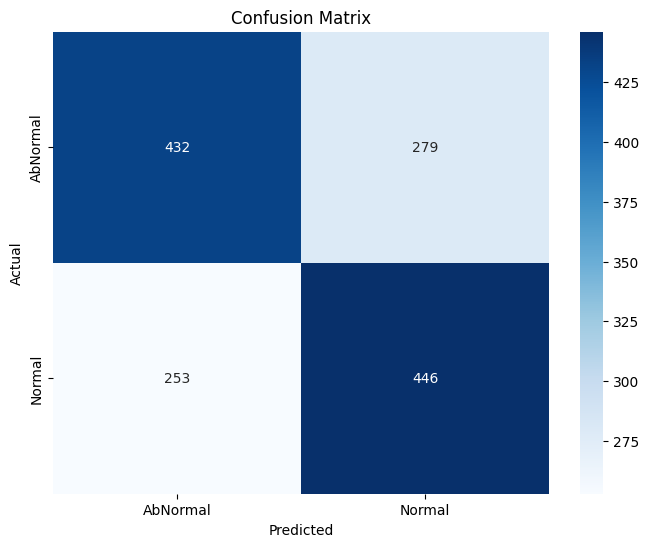

In [ ]:
# 예측
y_pred = rf_model.predict(X_test)

# 성능 평가 보고서 출력
print("검증 데이터 평가 결과:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.inverse_transform([0, 1])))

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=label_encoder.inverse_transform([0, 1]), yticklabels=label_encoder.inverse_transform([0, 1]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#KNN 언더샘플링(Randomundersampler, TOMEK)

검증 데이터 평가 결과:

              precision    recall  f1-score   support

    AbNormal       0.61      0.58      0.59       711
      Normal       0.59      0.61      0.60       699

    accuracy                           0.60      1410
   macro avg       0.60      0.60      0.60      1410
weighted avg       0.60      0.60      0.60      1410



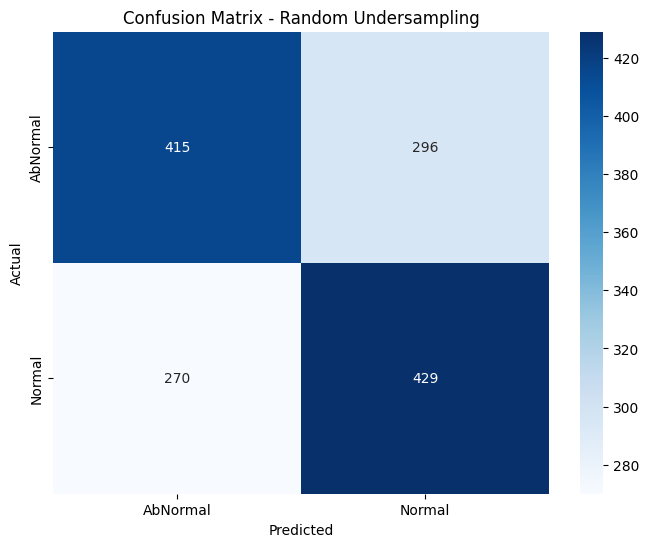

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

# 데이터 로드
data = pd.read_csv('imputed.csv')  # CSV 파일 로드

# 타겟 변수 인코딩
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

# 문자열 데이터를 숫자로 변환
for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# 피처와 타겟 분리
X = data.drop('target', axis=1)
y = data['target']

# Random Undersampling 적용
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X, y)

# 데이터 분할 (Train 70%, Test 30%)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# KNN 모델 생성 및 훈련
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 예측
y_pred = knn_model.predict(X_test)

# 성능 평가 보고서 출력
print("검증 데이터 평가 결과:\n")
if len(set(y_test)) > 1:
    print(classification_report(y_test, y_pred, target_names=label_encoder.inverse_transform([0, 1])))
else:
    single_class = list(set(y_test))[0]
    print(f"Warning: y_test contains only one class: {single_class}. Classification report is adjusted.")
    print(classification_report(y_test, y_pred, target_names=[label_encoder.inverse_transform([single_class])[0]]))

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
if len(set(y_test)) > 1:
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=label_encoder.inverse_transform([0, 1]),
                yticklabels=label_encoder.inverse_transform([0, 1]))
else:
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=[label_encoder.inverse_transform([single_class])[0]],
                yticklabels=[label_encoder.inverse_transform([single_class])[0]])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Undersampling')
plt.show()


검증 데이터 평가 결과:

              precision    recall  f1-score   support

    AbNormal       0.64      0.70      0.67       682
      Normal       0.58      0.52      0.55       548

    accuracy                           0.62      1230
   macro avg       0.61      0.61      0.61      1230
weighted avg       0.61      0.62      0.62      1230



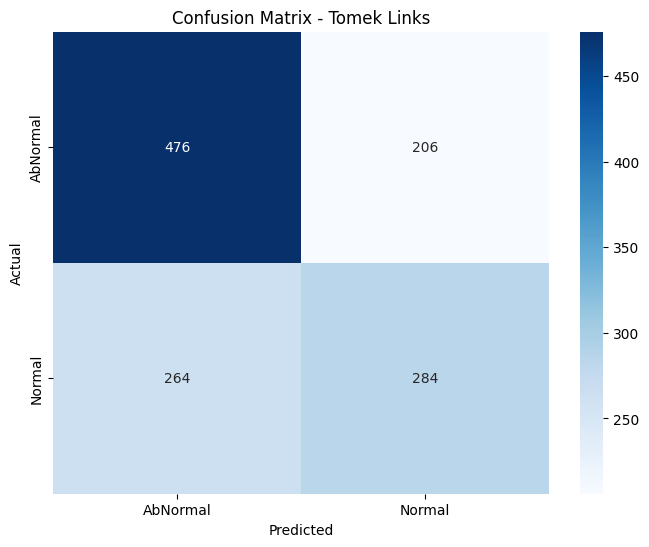

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import TomekLinks

# 데이터 로드
data = pd.read_csv('imputed.csv')  # CSV 파일 로드

# 타겟 변수 인코딩
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

# 문자열 데이터를 숫자로 변환
for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# 피처와 타겟 분리
X = data.drop('target', axis=1)
y = data['target']

# Tomek Links 적용
tomek = TomekLinks()
X_res, y_res = tomek.fit_resample(X, y)

# 데이터 분할 (Train 70%, Test 30%)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# KNN 모델 생성 및 훈련
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 예측
y_pred = knn_model.predict(X_test)

# 성능 평가 보고서 출력
print("검증 데이터 평가 결과:\n")
if len(set(y_test)) > 1:
    print(classification_report(y_test, y_pred, target_names=label_encoder.inverse_transform([0, 1])))
else:
    single_class = list(set(y_test))[0]
    print(f"Warning: y_test contains only one class: {single_class}. Classification report is adjusted.")
    print(classification_report(y_test, y_pred, target_names=[label_encoder.inverse_transform([single_class])[0]]))

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
if len(set(y_test)) > 1:
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=label_encoder.inverse_transform([0, 1]),
                yticklabels=label_encoder.inverse_transform([0, 1]))
else:
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=[label_encoder.inverse_transform([single_class])[0]],
                yticklabels=[label_encoder.inverse_transform([single_class])[0]])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tomek Links')
plt.show()


#KNN, 오버샘플링(Resampling, SMOTE, Borderline-SMOTE, ADASYN)

검증 데이터 평가 결과:

              precision    recall  f1-score   support

    AbNormal       0.57      0.62      0.59       699
      Normal       0.59      0.54      0.56       711

    accuracy                           0.58      1410
   macro avg       0.58      0.58      0.58      1410
weighted avg       0.58      0.58      0.58      1410



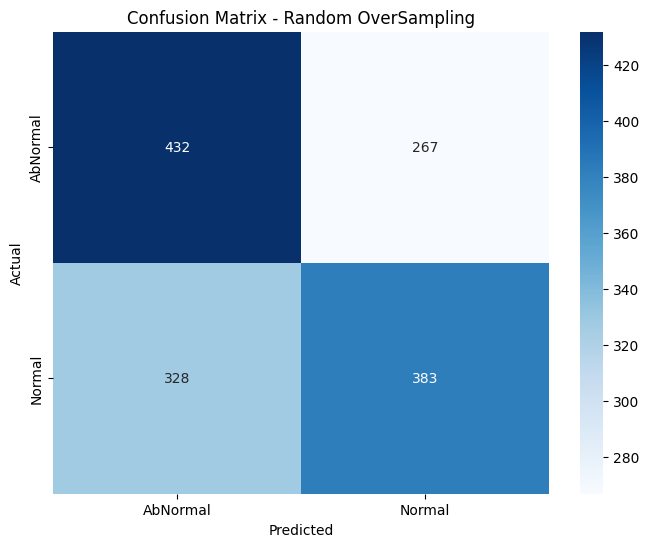

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

# 데이터 로드
data = pd.read_csv('imputed.csv')  # CSV 파일 로드

# 타겟 변수 인코딩
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

# 문자열 데이터를 숫자로 변환
for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# 피처와 타겟 분리
X = data.drop('target', axis=1)
y = data['target']

# Random OverSampling 적용
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# 데이터 분할 (Train 70%, Test 30%)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# KNN 모델 생성 및 훈련
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 예측
y_pred = knn_model.predict(X_test)

# 성능 평가 보고서 출력
print("검증 데이터 평가 결과:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.inverse_transform([0, 1]), labels=[0, 1]))

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=label_encoder.inverse_transform([0, 1]),
            yticklabels=label_encoder.inverse_transform([0, 1]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random OverSampling')
plt.show()


검증 데이터 평가 결과:

              precision    recall  f1-score   support

    AbNormal       0.57      0.62      0.59       699
      Normal       0.59      0.54      0.56       711

    accuracy                           0.58      1410
   macro avg       0.58      0.58      0.58      1410
weighted avg       0.58      0.58      0.58      1410



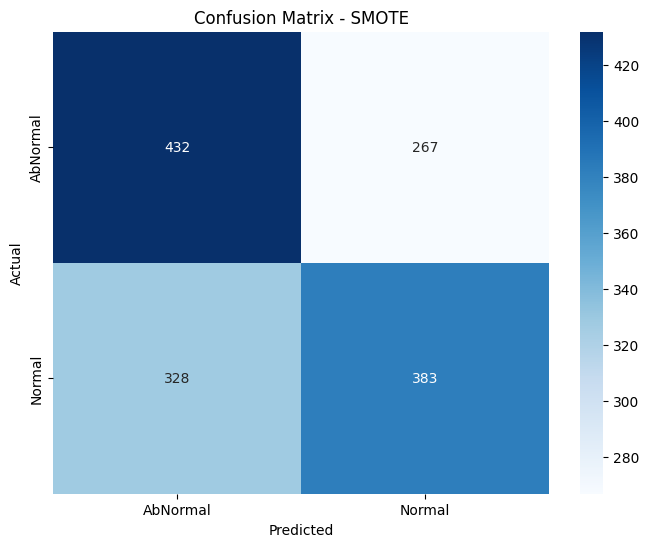

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# 데이터 로드
data = pd.read_csv('imputed.csv')  # CSV 파일 로드

# 타겟 변수 인코딩
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

# 문자열 데이터를 숫자로 변환
for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# 피처와 타겟 분리
X = data.drop('target', axis=1)
y = data['target']

# SMOTE 적용
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 데이터 분할 (Train 70%, Test 30%)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# KNN 모델 생성 및 훈련
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 예측
y_pred = knn_model.predict(X_test)

# 성능 평가 보고서 출력
print("검증 데이터 평가 결과:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.inverse_transform([0, 1]), labels=[0, 1]))

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=label_encoder.inverse_transform([0, 1]),
            yticklabels=label_encoder.inverse_transform([0, 1]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SMOTE')
plt.show()


검증 데이터 평가 결과:

              precision    recall  f1-score   support

    AbNormal       0.57      0.62      0.59       699
      Normal       0.59      0.54      0.56       711

    accuracy                           0.58      1410
   macro avg       0.58      0.58      0.58      1410
weighted avg       0.58      0.58      0.58      1410



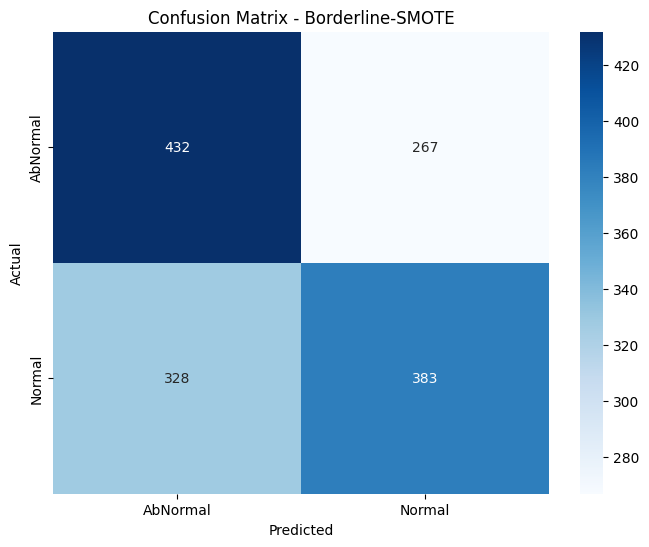

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import BorderlineSMOTE

# 데이터 로드
data = pd.read_csv('imputed.csv')  # CSV 파일 로드

# 타겟 변수 인코딩
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

# 문자열 데이터를 숫자로 변환
for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# 피처와 타겟 분리
X = data.drop('target', axis=1)
y = data['target']

# Borderline-SMOTE 적용
borderline_smote = BorderlineSMOTE(random_state=42)
X_res, y_res = borderline_smote.fit_resample(X, y)

# 데이터 분할 (Train 70%, Test 30%)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# KNN 모델 생성 및 훈련
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 예측
y_pred = knn_model.predict(X_test)

# 성능 평가 보고서 출력
print("검증 데이터 평가 결과:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.inverse_transform([0, 1]), labels=[0, 1]))

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=label_encoder.inverse_transform([0, 1]),
            yticklabels=label_encoder.inverse_transform([0, 1]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Borderline-SMOTE')
plt.show()


검증 데이터 평가 결과:

              precision    recall  f1-score   support

    AbNormal       0.57      0.62      0.59       699
      Normal       0.59      0.54      0.56       711

    accuracy                           0.58      1410
   macro avg       0.58      0.58      0.58      1410
weighted avg       0.58      0.58      0.58      1410



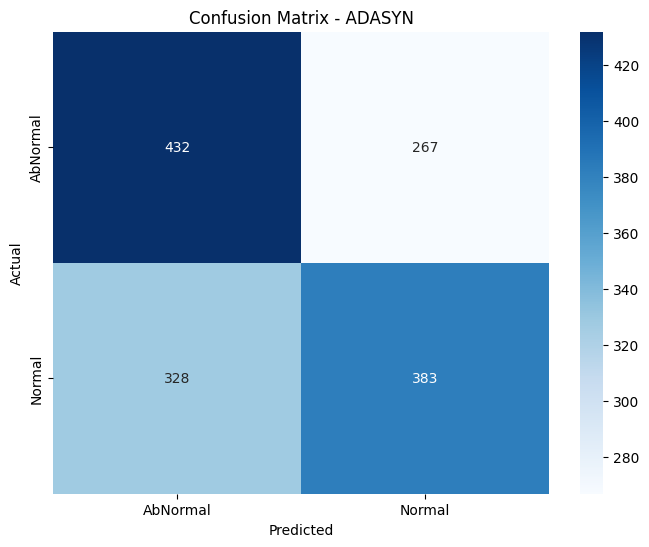

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN

# 데이터 로드
data = pd.read_csv('imputed.csv')  # CSV 파일 로드

# 타겟 변수 인코딩
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

# 문자열 데이터를 숫자로 변환
for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# 피처와 타겟 분리
X = data.drop('target', axis=1)
y = data['target']

# ADASYN 적용
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X, y)

# 데이터 분할 (Train 70%, Test 30%)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# KNN 모델 생성 및 훈련
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 예측
y_pred = knn_model.predict(X_test)

# 성능 평가 보고서 출력
print("검증 데이터 평가 결과:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.inverse_transform([0, 1]), labels=[0, 1]))

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=label_encoder.inverse_transform([0, 1]),
            yticklabels=label_encoder.inverse_transform([0, 1]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ADASYN')
plt.show()


#KNN 특정클래스에 가중치로

검증 데이터 평가 결과:

              precision    recall  f1-score   support

    AbNormal       0.51      0.25      0.34       711
      Normal       0.78      0.92      0.85      2109

    accuracy                           0.75      2820
   macro avg       0.65      0.59      0.59      2820
weighted avg       0.72      0.75      0.72      2820



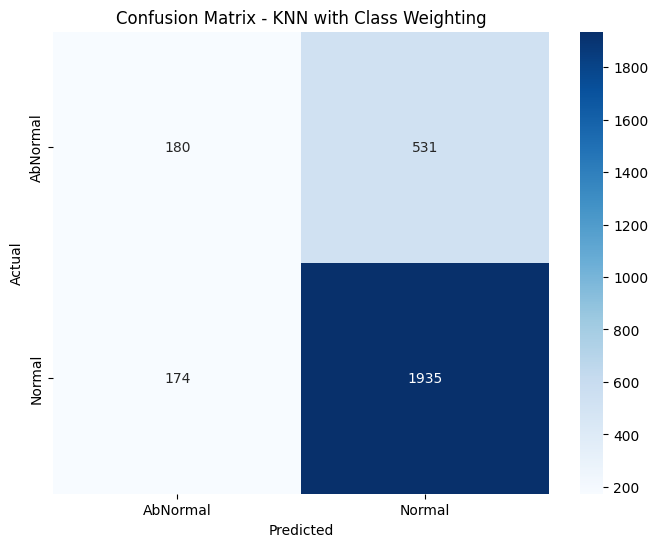

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('imputed.csv')  # CSV 파일 로드

# 타겟 변수 인코딩
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

# 문자열 데이터를 숫자로 변환
for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# 피처와 타겟 분리
X = data.drop('target', axis=1)
y = data['target']

# 특정 클래스에 가중치 적용 (예: 소수 클래스 데이터 복제)
class_weights = {0: 1, 1: 3}  # 0은 다수 클래스, 1은 소수 클래스 가중치 예시
weights = np.array([class_weights[i] for i in y])

# 데이터 복제
X_res = np.repeat(X, weights, axis=0)
y_res = np.repeat(y, weights)

# 데이터 분할 (Train 70%, Test 30%)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# KNN 모델 생성 및 훈련
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 예측
y_pred = knn_model.predict(X_test)

# 성능 평가 보고서 출력
print("검증 데이터 평가 결과:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.inverse_transform([0, 1]), labels=[0, 1]))

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=label_encoder.inverse_transform([0, 1]),
            yticklabels=label_encoder.inverse_transform([0, 1]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN with Class Weighting')
plt.show()
